In [9]:
import numpy as np
import scipy.optimize as opt
import scipy.interpolate as interp
import matplotlib.pyplot as plt

In [10]:
# cascade reaction A→P→S
k1 = lambda T: 8.976446823e5 * np.exp(-41.4235531 / 8.314e-3 / T)  # 1/s
k2 = lambda T: 4.845990778e10 * np.exp(-112.9733266 / 8.314e-3 / T)

VR      = 0.01    # m3
CA0     = 0.3     # kmol/m3
CP0     = 0.0
CS0     = 0.0
v       = 0.01667   # m3/s
T0      = 250       # K
dH1     = -55e6  # J/kmol
dH2     = -71.5e6
rho     = 100     # kg/m3
Cp      = 600     # J/(kg*K)
Tc      = 333.15
UA      = 666.67    # J/(s*K)

In [11]:
T = np.linspace(270, 800, 50)
sv = np.linspace(0, 2, 20).reshape((-1, 1))

C0 = np.zeros((3, sv.size, T.size))
C0[:] = np.array([CA0, CP0, CS0]).reshape((-1, 1, 1))

def residual(C):
    return np.array([sv * VR * (CA0 - C[0]) - VR * k1(T) * C[0],
            sv * VR * (CP0 - C[1]) + VR * (k1(T) * C[0] - k2(T) * C[1]),
            sv * VR * (CS0 - C[2]) + VR * k2(T) * C[1]])

sol = opt.root(residual, C0, method='krylov')

C:\Users\Crema\AppData\Local\Temp\ipykernel_2224\849260991.py:3: RuntimeWarning: divide by zero encountered in divide
  T0_2d = ((UA + sv * VR * rho * Cp) * T - Q_gen - UA * Tc) / (sv * VR * rho * Cp)


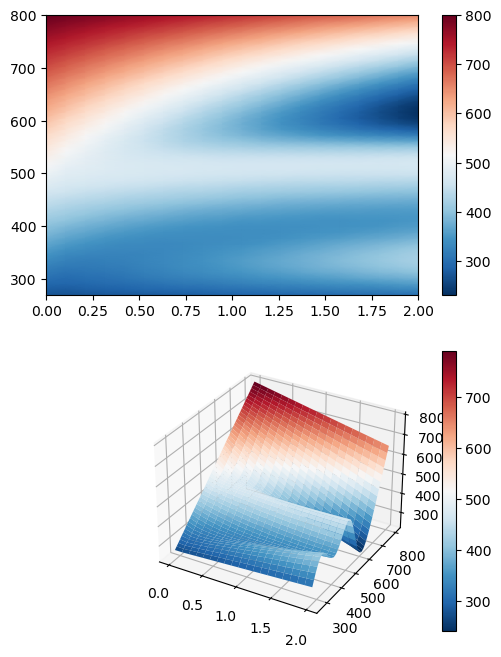

In [12]:
CA, CP, _ = sol.x
Q_gen = -VR * (dH1 * k1(T) * CA + dH2 * k2(T) * CP)
T0_2d = ((UA + sv * VR * rho * Cp) * T - Q_gen - UA * Tc) / (sv * VR * rho * Cp)
Tc_2d = ((UA + sv * VR * rho * Cp) * T - Q_gen - sv * VR * rho * Cp * T0) / UA
fig = plt.figure(figsize=(6, 8))
ax1= fig.add_subplot(2, 1, 1)
ax2= fig.add_subplot(2, 1, 2, projection='3d')
x, y = np.meshgrid(sv, T, indexing='ij')

contour = ax1.pcolormesh(x, y, Tc_2d, shading='gouraud', cmap='RdBu_r')
surf = ax2.plot_surface(x, y, Tc_2d, cmap='RdBu_r')
# contour = ax1.pcolormesh(x, y, Q_gen, shading='gouraud', cmap='RdBu_r')
# surf = ax2.plot_surface(x, y, Q_gen, cmap='RdBu_r')
fig.colorbar(contour)
fig.colorbar(surf)